# No. 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil data dari file JSON
data_url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
data = pd.read_json(data_url)
df = pd.DataFrame(data)
df

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
2,3,02-11-2023,Bob Johnson,800.0,technology,Laptop,credit card,failed
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
...,...,...,...,...,...,...,...,...
95,96,21-12-2023,Oliver Brown,15.0,kitchen,Peeler,credit card,success
96,97,21-12-2023,Chloe Wilson,75.5,book,The Road,credit card,success
97,98,22-12-2023,Ella Harris,30.0,gaming,Board Game: Monopoly,cash,success
98,99,22-12-2023,Liam Turner,180.0,technology,Bluetooth Earbuds,e wallet,success


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      100 non-null    int64  
 1   transaction_date    100 non-null    object 
 2   customer_name       100 non-null    object 
 3   transaction_amount  100 non-null    float64
 4   item_category       100 non-null    object 
 5   item_name           100 non-null    object 
 6   payment_method      100 non-null    object 
 7   status              100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [3]:
df.drop_duplicates()

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
2,3,02-11-2023,Bob Johnson,800.0,technology,Laptop,credit card,failed
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
...,...,...,...,...,...,...,...,...
95,96,21-12-2023,Oliver Brown,15.0,kitchen,Peeler,credit card,success
96,97,21-12-2023,Chloe Wilson,75.5,book,The Road,credit card,success
97,98,22-12-2023,Ella Harris,30.0,gaming,Board Game: Monopoly,cash,success
98,99,22-12-2023,Liam Turner,180.0,technology,Bluetooth Earbuds,e wallet,success


## a. Jumlah Nilai Transaksi Perhari

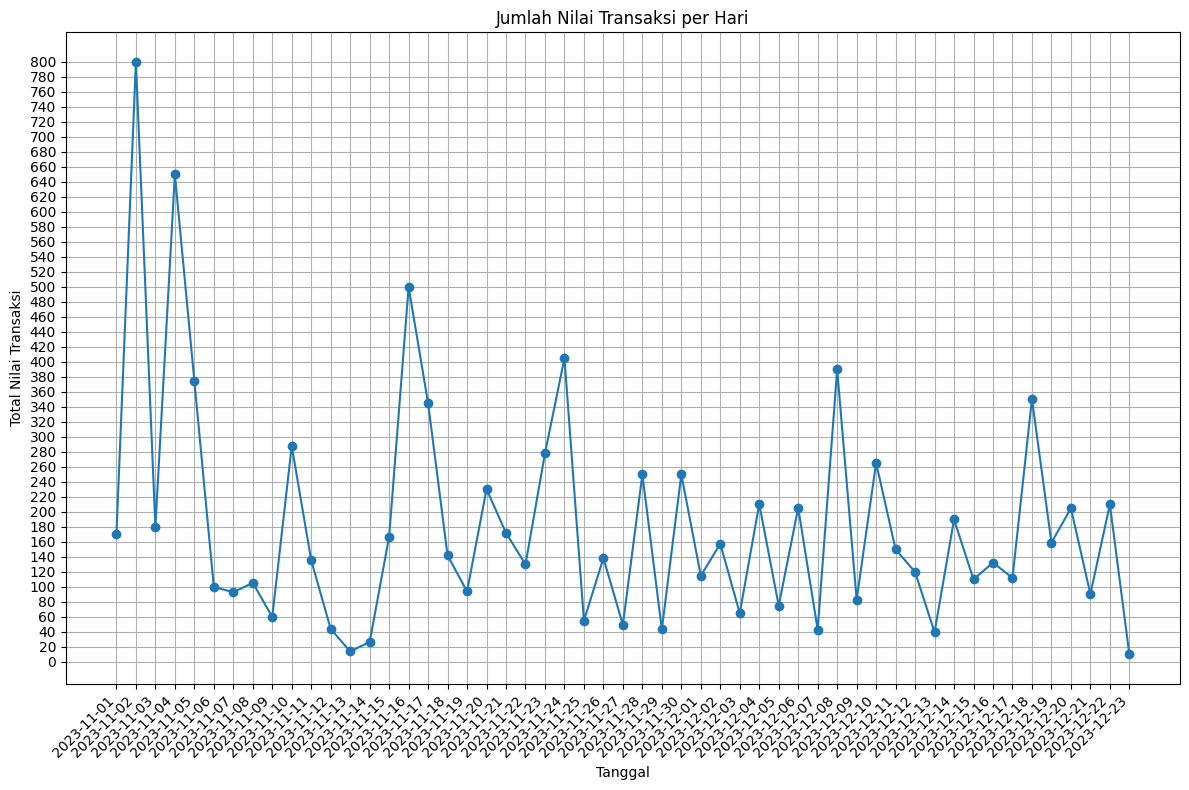

In [4]:
# Pra-pemrosesan data
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 8))
total_harian = df.groupby(df['transaction_date'].dt.floor('D'))['transaction_amount'].sum()
plt.plot(total_harian, marker='o')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Nilai Transaksi')

# Atur penanda sumbu-x dan label harian
plt.xticks(total_harian.index, rotation=45, ha='right')

# Atur jarak pada label sumbu y menjadi 20
plt.yticks(range(0, int(total_harian.max())+20, 20))

plt.grid(True)
plt.tight_layout()
plt.show()

## b. Kategori Barang yang paling banyak dibeli

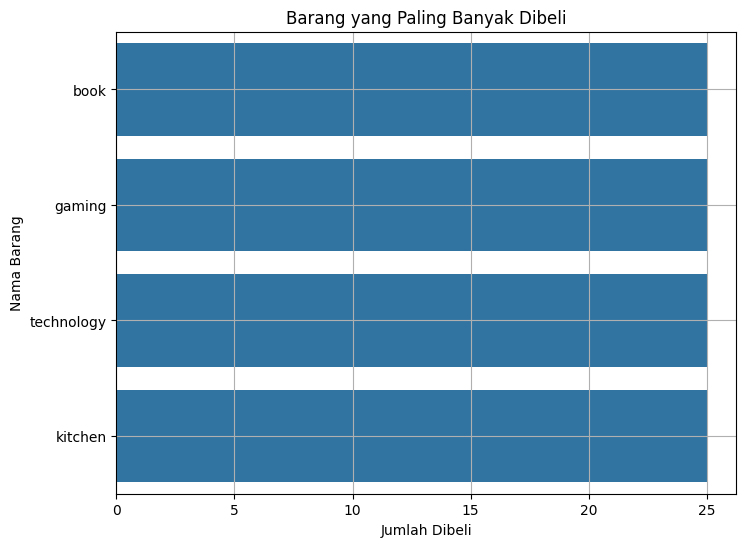

In [5]:
# Visualisasi jenis roti yang paling banyak dipesan
plt.figure(figsize=(8, 6))
sns.countplot(y='item_category', data=df, order=df['item_category'].value_counts().index)
plt.title('Barang yang Paling Banyak Dibeli')
plt.xlabel('Jumlah Dibeli')
plt.ylabel('Nama Barang')
plt.grid(True)
plt.show()

## c. Jumlah nilai transaksi dengan metode pembayaran e-wallet.

In [6]:
# Filter transaksi dengan metode pembayaran e-wallet
ewallet_transactions = df[df['payment_method'] == 'e wallet']

# Menghitung jumlah nilai transaksi dengan metode pembayaran e-wallet
total_ewallet_transaction = ewallet_transactions['transaction_amount'].sum()

print("Total nilai transaksi dengan metode pembayaran e-wallet:", total_ewallet_transaction)

Total nilai transaksi dengan metode pembayaran e-wallet: 3950.5


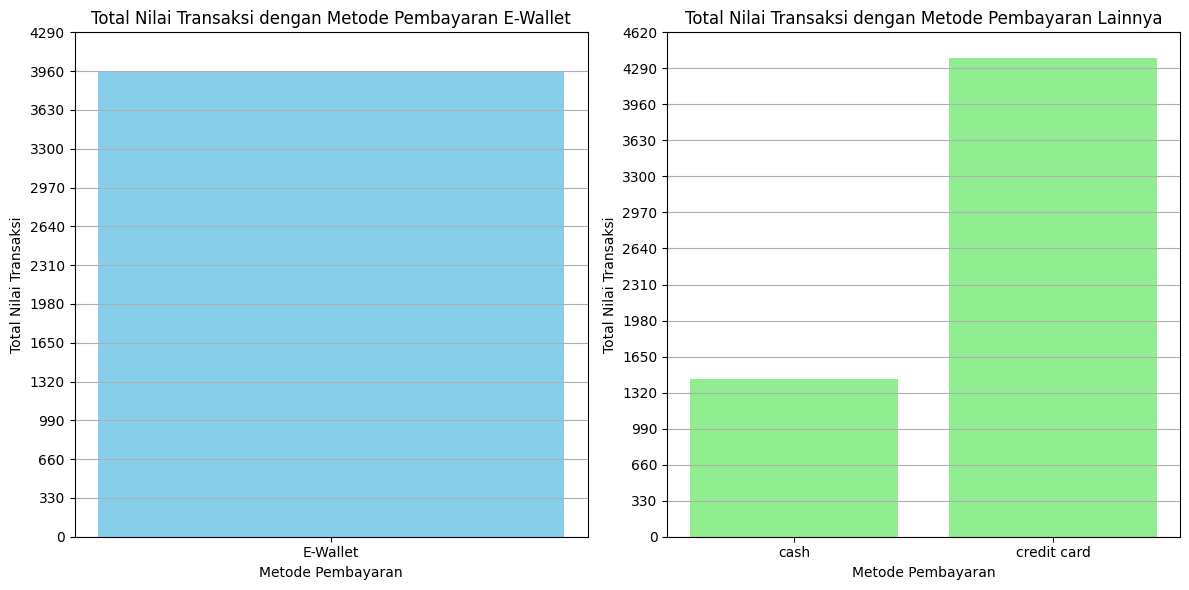

In [7]:
# Menghitung jumlah total nilai transaksi untuk semua metode pembayaran
total_transaction_by_method = df.groupby('payment_method')['transaction_amount'].sum()

# Membuat subplots dengan ukuran tetap (1, 2)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot untuk metode pembayaran e-wallet
axs[0].bar("E-Wallet", total_ewallet_transaction, color='skyblue')
axs[0].set_title('Total Nilai Transaksi dengan Metode Pembayaran E-Wallet')
axs[0].set_xlabel('Metode Pembayaran')
axs[0].set_ylabel('Total Nilai Transaksi')
axs[0].set_yticks(range(0, int(total_ewallet_transaction.max())+500, 330))
axs[0].grid(axis='y')

# Bar plot untuk metode pembayaran lainnya
other_methods = total_transaction_by_method.drop('e wallet')
axs[1].bar(other_methods.index, other_methods.values, color='lightgreen')
axs[1].set_title('Total Nilai Transaksi dengan Metode Pembayaran Lainnya')
axs[1].set_xlabel('Metode Pembayaran')
axs[1].set_ylabel('Total Nilai Transaksi')
axs[1].set_yticks(range(0, int(other_methods.max())+500, 330))
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

## d. Nilai maksimal, nilai minimal dan nilai tengah dari jumlah nilai transaksi yang dilakukan.

In [8]:
# Nilai maksimal dari jumlah nilai transaksi
nilai_maksimal = df['transaction_amount'].max()

# Nilai minimal dari jumlah nilai transaksi
nilai_minimal = df['transaction_amount'].min()

# Nilai tengah dari jumlah nilai transaksi
nilai_tengah = df['transaction_amount'].median()

print("Nilai maksimal:", nilai_maksimal)
print("Nilai minimal:", nilai_minimal)
print("Nilai tengah:", nilai_tengah)

Nilai maksimal: 800.0
Nilai minimal: 5.0
Nilai tengah: 47.5


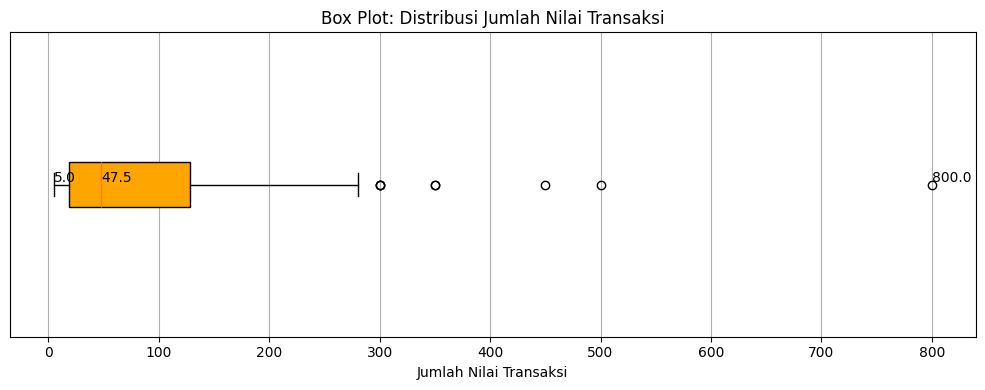

In [9]:
# Visualisasi menggunakan box plot
plt.figure(figsize=(10, 4))
plt.boxplot(df['transaction_amount'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Box Plot: Distribusi Jumlah Nilai Transaksi')
plt.xlabel('Jumlah Nilai Transaksi')
plt.yticks([])
plt.grid(True)

# Menambahkan teks untuk nilai maksimal, minimal, dan tengah
plt.text(nilai_maksimal, 1, f'{nilai_maksimal}', verticalalignment='bottom')
plt.text(nilai_minimal, 1, f'{nilai_minimal}', verticalalignment='bottom')
plt.text(nilai_tengah, 1, f'{nilai_tengah}', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# No. 2

In [60]:
# Mengambil data dari file JSON
data_csv_survey = "survey.csv"
data_survey = pd.read_csv(data_csv_survey)
df_survey = pd.DataFrame(data_survey)
df_survey

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,Emily Davis,21-25,-,C#,10000 - 25000,edutech
...,...,...,...,...,...,...
74,Liam Harris,31-40,HTML/CSS,PHP,more than 60000,software house
75,Olivia Robinson,17-20,React,Node.js,26000 - 40000,freelance
76,Noah Rodriguez,21-25,Vue.js,Python,41000 - 60000,software house
77,Emma Lee,26-30,-,Java,10000 - 25000,government


In [61]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    79 non-null     object
 1   age                     79 non-null     object
 2   favorite_front_end      79 non-null     object
 3   favorite_back_end       73 non-null     object
 4   salary_per_year_in_USD  68 non-null     object
 5   company_type            79 non-null     object
dtypes: object(6)
memory usage: 3.8+ KB


In [62]:
df_survey.drop_duplicates()

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,Emily Davis,21-25,-,C#,10000 - 25000,edutech
10,Sam Brown,-,Vue.js,Node.js,26000 - 40000,software house
11,Sophie White,21-25,React,Python,NaN,fintech
12,Chris Turner,17-20,JavaScript,NaN,41000 - 60000,edutech
13,Mia Green,26-30,Angular,Java,10000 - 25000,government
14,Liam Harris,31-40,HTML/CSS,PHP,more than 60000,software house


In [63]:
df_survey_clean = df_survey.dropna(subset=['favorite_back_end', 'salary_per_year_in_USD'])

In [64]:
# Menghapus baris dengan nilai '-' pada kolom 'age'
df_survey_clean = df_survey_clean[df_survey_clean['age'] != "-"]

# Menghapus baris dengan nilai '-' pada kolom 'favorite_front_end'
df_survey_clean = df_survey_clean[df_survey_clean['favorite_front_end'] != "-"]

In [65]:
# Reset indeks DataFrame
df_survey_clean.reset_index(drop=True, inplace=True)

In [66]:
df_survey_clean

,name,age,favorite_front_end,favorite_back_end,salary_per_year_in_USD,company_type
0,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
1,Jane Smith,31-40,React,Java,more than 60000,fintech
2,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
3,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
4,John Doe,19,JavaScript,Node.js,26000 - 40000,software house
5,Jane Smith,31-40,React,Java,more than 60000,fintech
6,Alice Johnson,17-20,HTML/CSS,Python,10000 - 25000,freelance
7,Bob Williams,26-30,Angular,PHP,41000 - 60000,software house
8,Mia Green,26-30,Angular,Java,10000 - 25000,government
9,Liam Harris,31-40,HTML/CSS,PHP,more than 60000,software house


In [67]:
df_survey_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    53 non-null     object
 1   age                     53 non-null     object
 2   favorite_front_end      53 non-null     object
 3   favorite_back_end       53 non-null     object
 4   salary_per_year_in_USD  53 non-null     object
 5   company_type            53 non-null     object
dtypes: object(6)
memory usage: 2.6+ KB


## a. Persentase responden berdasarkan umur

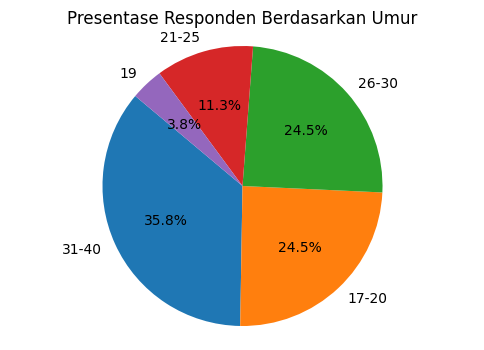

In [68]:
# Menghitung jumlah responden berdasarkan umur
age_counts = df_survey_clean['age'].value_counts()

# Menggambar pie chart
plt.figure(figsize=(6, 4))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Presentase Responden Berdasarkan Umur')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

## b. Bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan front end.

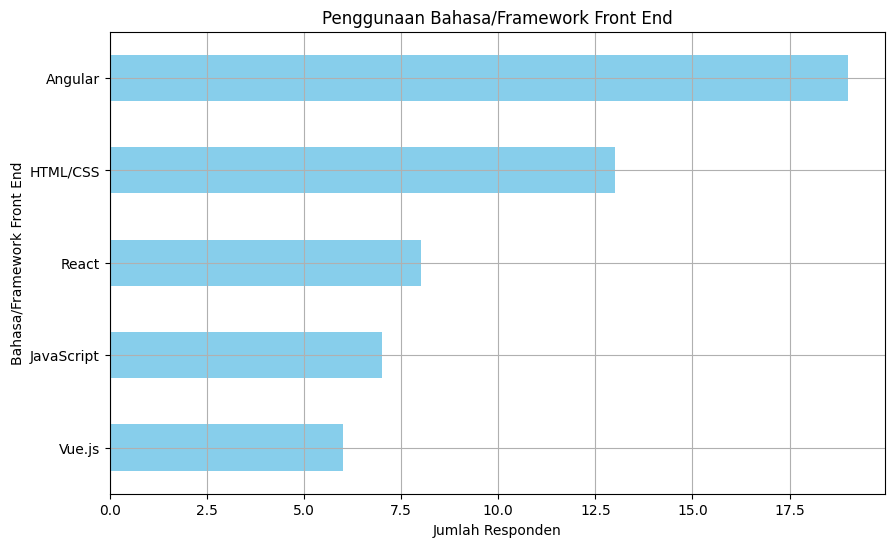

In [69]:
# Menghitung jumlah penggunaan setiap bahasa/framework front end
front_end_counts = df_survey_clean['favorite_front_end'].value_counts()

# Membuat plot
plt.figure(figsize=(10, 6))
front_end_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah Responden')
plt.ylabel('Bahasa/Framework Front End')
plt.title('Penggunaan Bahasa/Framework Front End')
plt.grid(True)
plt.gca().invert_yaxis()  # Membalikkan urutan agar nilai terbanyak ada di atas
plt.show()

## c. Bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan back end.

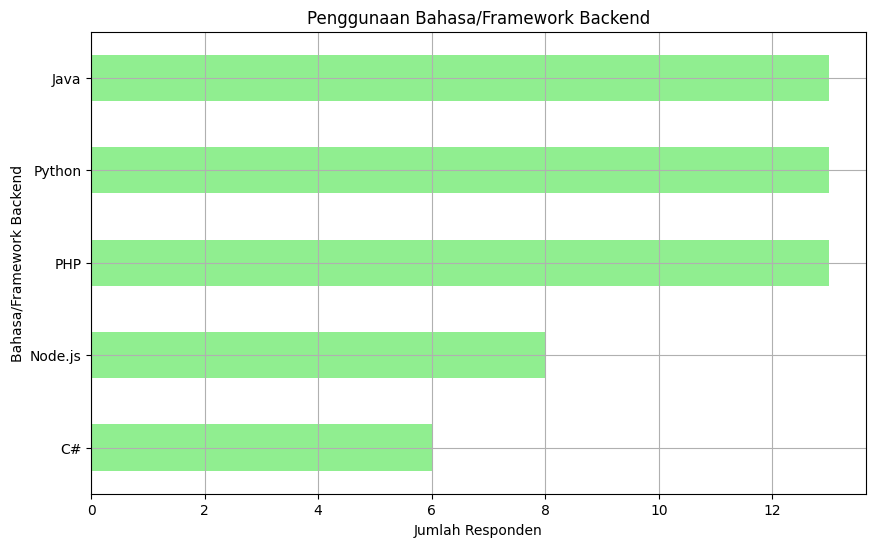

In [70]:
# Menghitung jumlah penggunaan setiap bahasa/framework backend
back_end_counts = df_survey_clean['favorite_back_end'].value_counts()

# Membuat plot
plt.figure(figsize=(10, 6))
back_end_counts.plot(kind='barh', color='lightgreen')
plt.xlabel('Jumlah Responden')
plt.ylabel('Bahasa/Framework Backend')
plt.grid(True)
plt.title('Penggunaan Bahasa/Framework Backend')
plt.gca().invert_yaxis()  # Membalikkan urutan agar nilai terbanyak ada di atas
plt.show()

## d. Persentase bahasa pemrograman / framework yang dipilih dalam pengembangan front end.

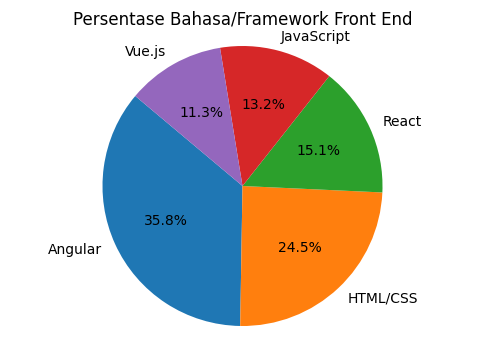

In [71]:
# Menghitung jumlah penggunaan setiap bahasa/framework front end
front_end_counts = df_survey_clean['favorite_front_end'].value_counts()

# Membuat plot
plt.figure(figsize=(6, 4))
plt.pie(front_end_counts, labels=front_end_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Bahasa/Framework Front End')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

## e. Rentangan gaji per tahun yang paling banyak berdasarkan hasil survei.

Rentang gaji per tahun yang paling banyak berdasarkan survei adalah: more than 60000


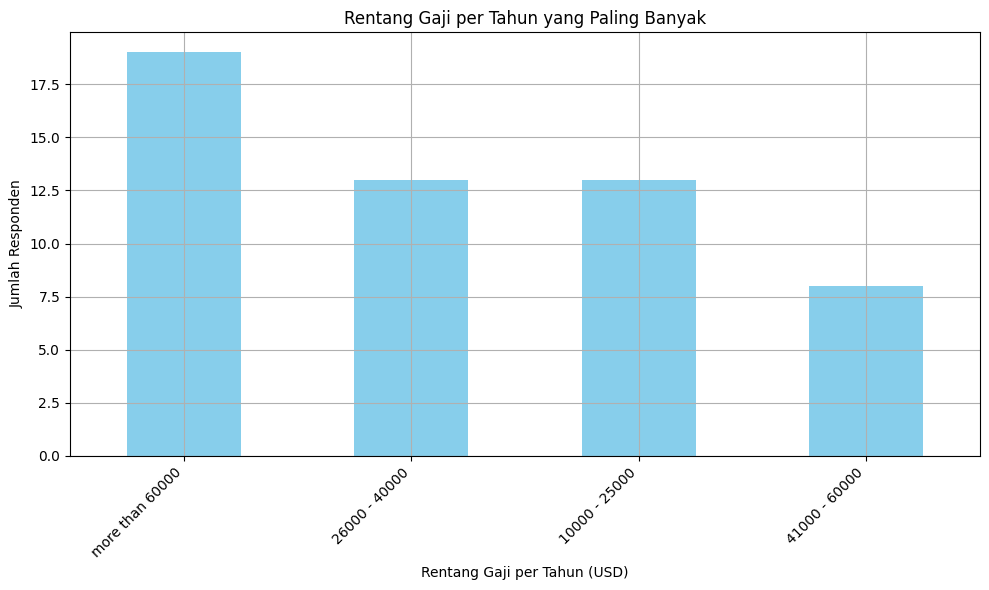

In [73]:
# Mengubah tipe data kolom 'salary_per_year_in_USD' menjadi string
df_survey_clean['salary_per_year_in_USD'] = df_survey_clean['salary_per_year_in_USD'].astype(str)

# Menghitung rentang gaji yang paling banyak
most_common_salary_range = df_survey_clean['salary_per_year_in_USD'].value_counts().idxmax()

# Menampilkan hasil
print("Rentang gaji per tahun yang paling banyak berdasarkan survei adalah:", most_common_salary_range)

# Visualisasi
plt.figure(figsize=(10, 6))
df_survey_clean['salary_per_year_in_USD'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Rentang Gaji per Tahun yang Paling Banyak')
plt.xlabel('Rentang Gaji per Tahun (USD)')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()